In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv


In [2]:
df = pd.read_csv("/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv")

In [3]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [5]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [6]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [7]:
df.shape

(308854, 19)

In [8]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

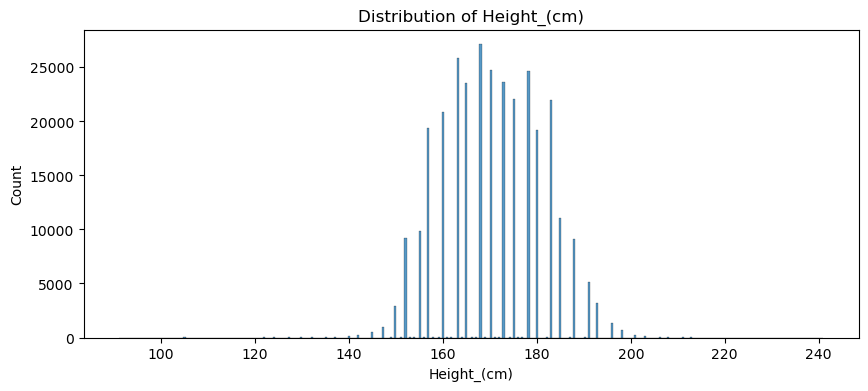

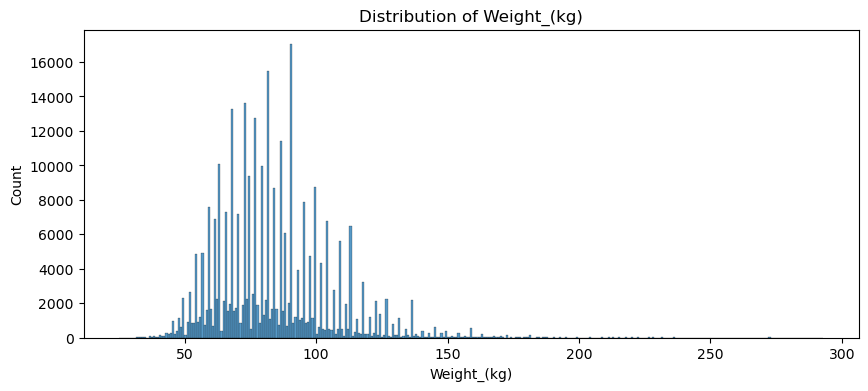

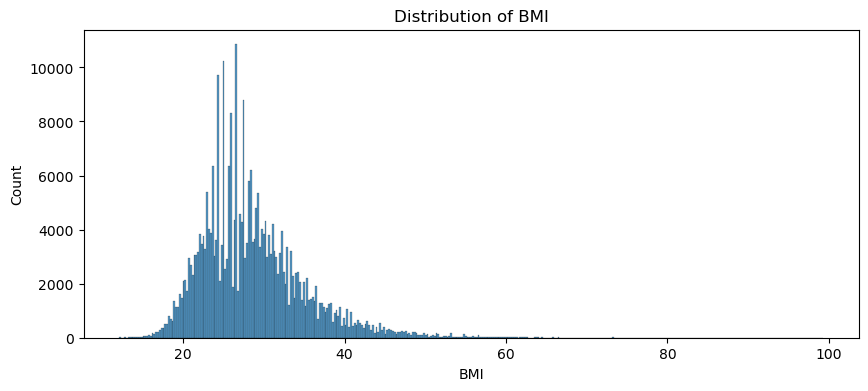

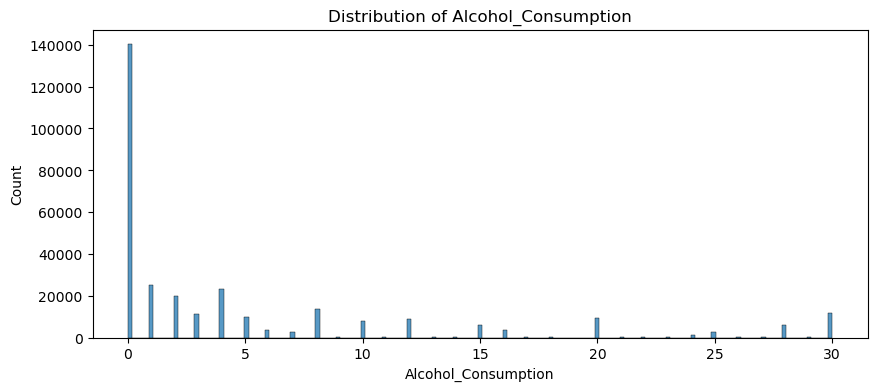

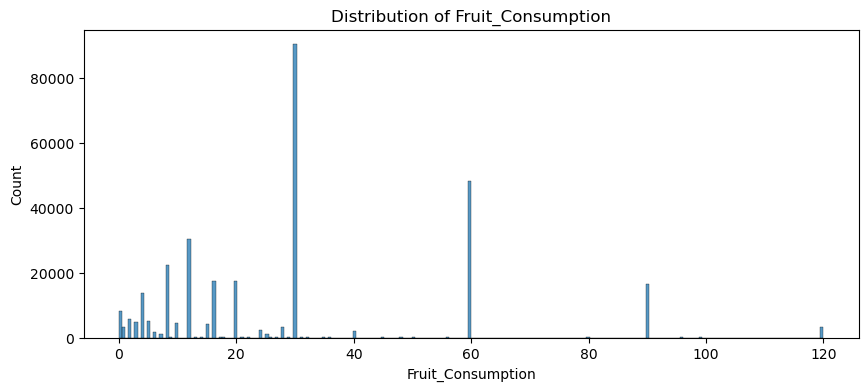

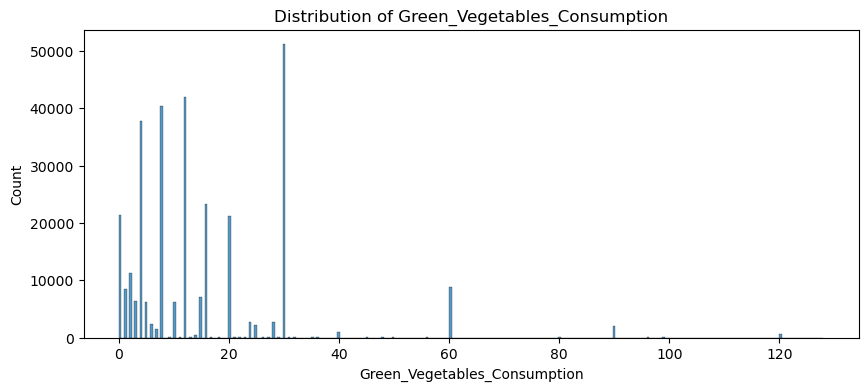

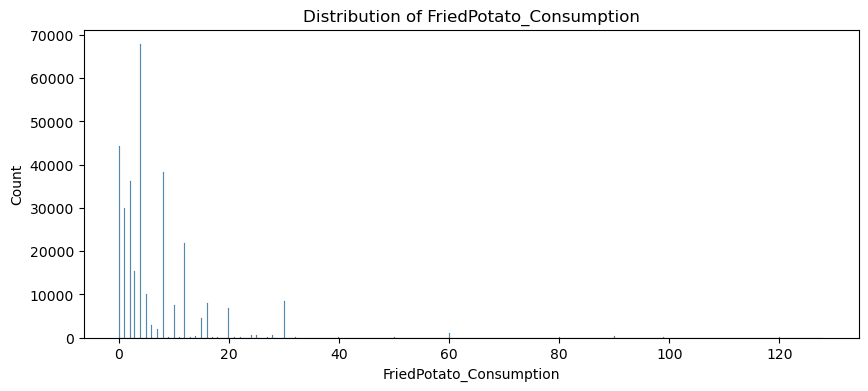

In [9]:
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for i in numerical_features:
    plt.figure(figsize = (10,4))
    sns.histplot(x = i , data = df)
    plt.title("Distribution of "+ i)
    plt.show()

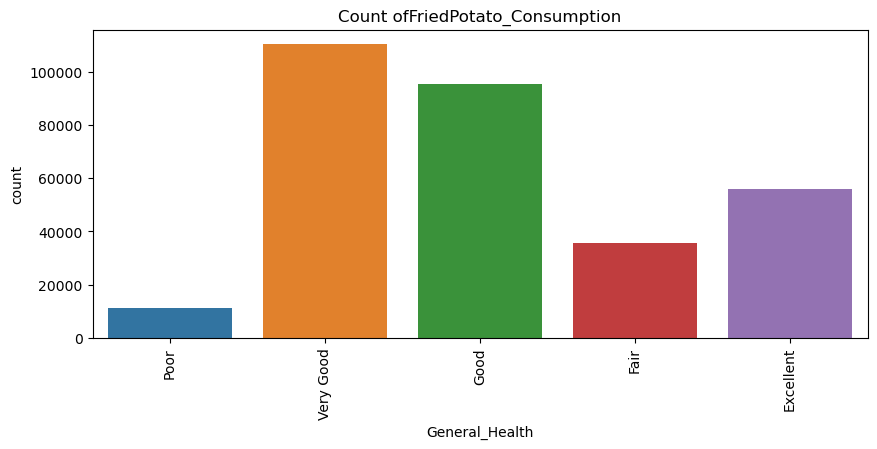

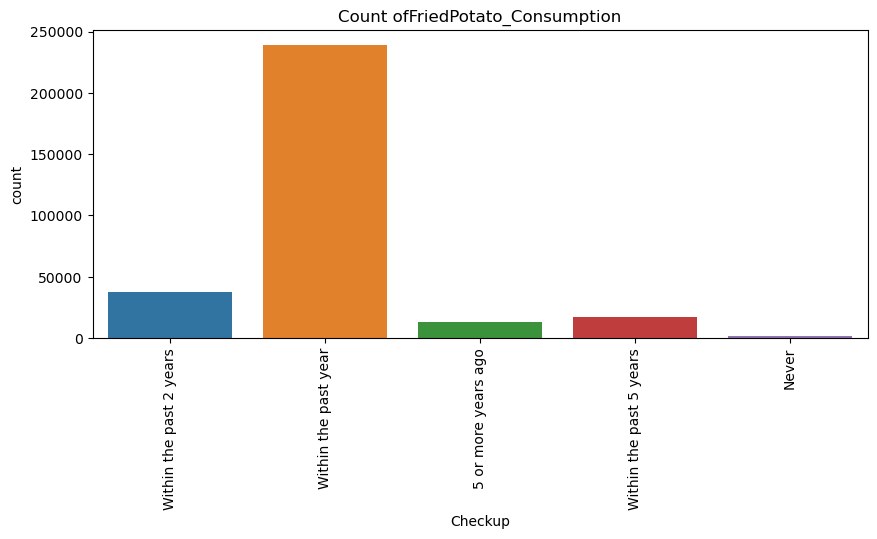

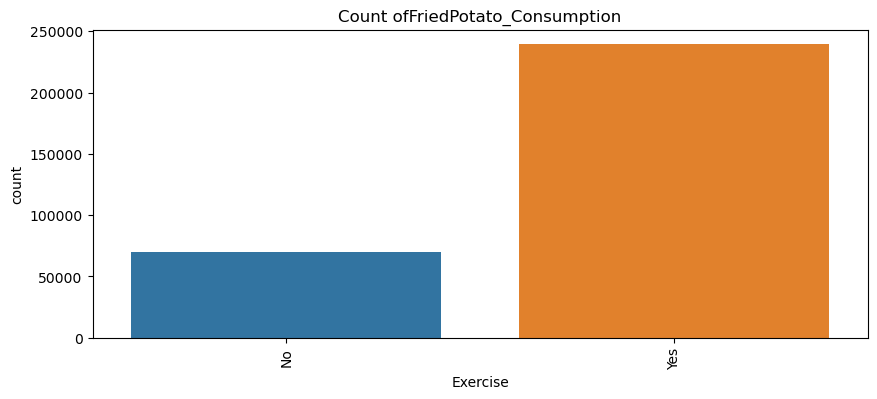

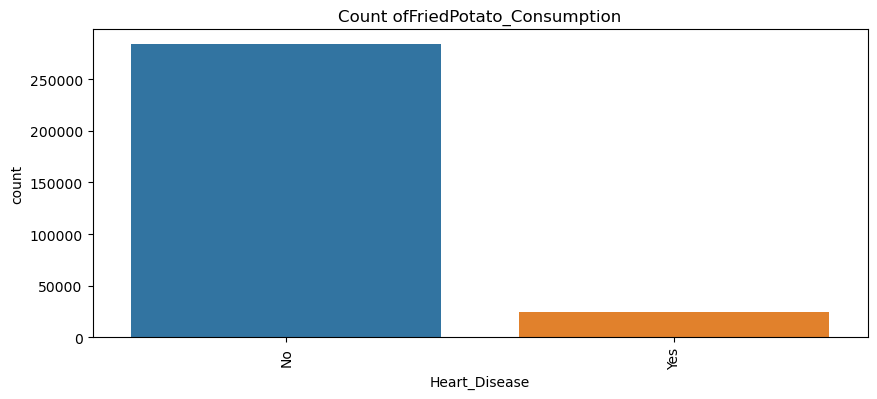

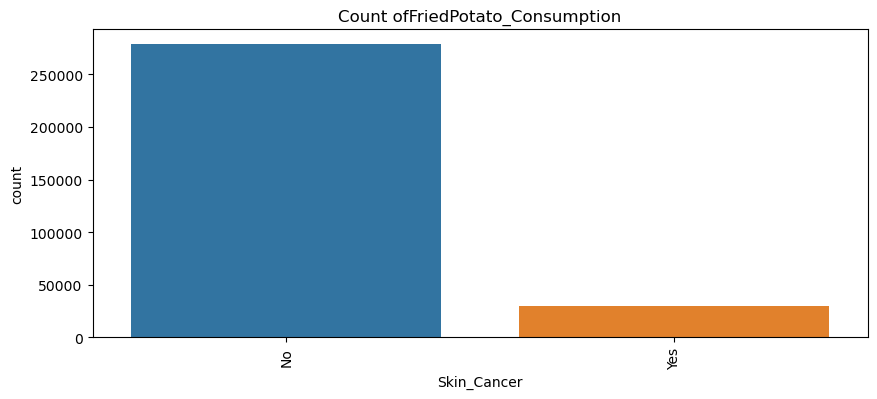

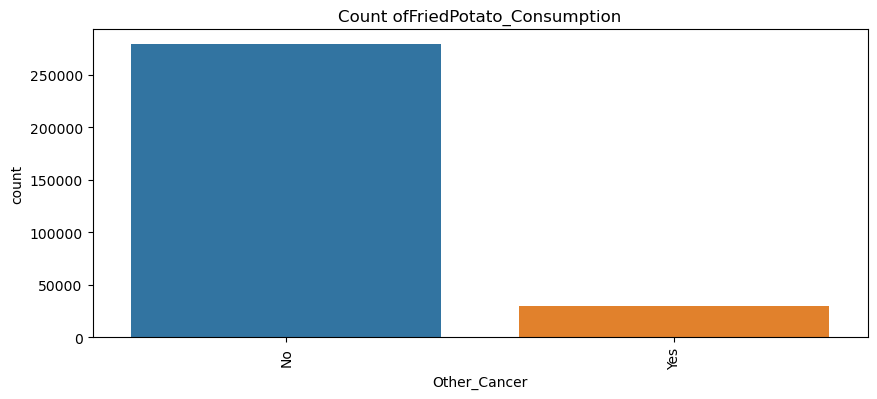

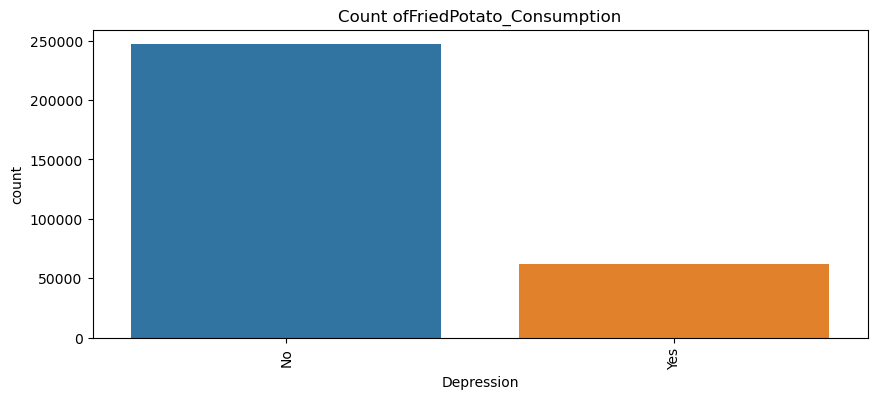

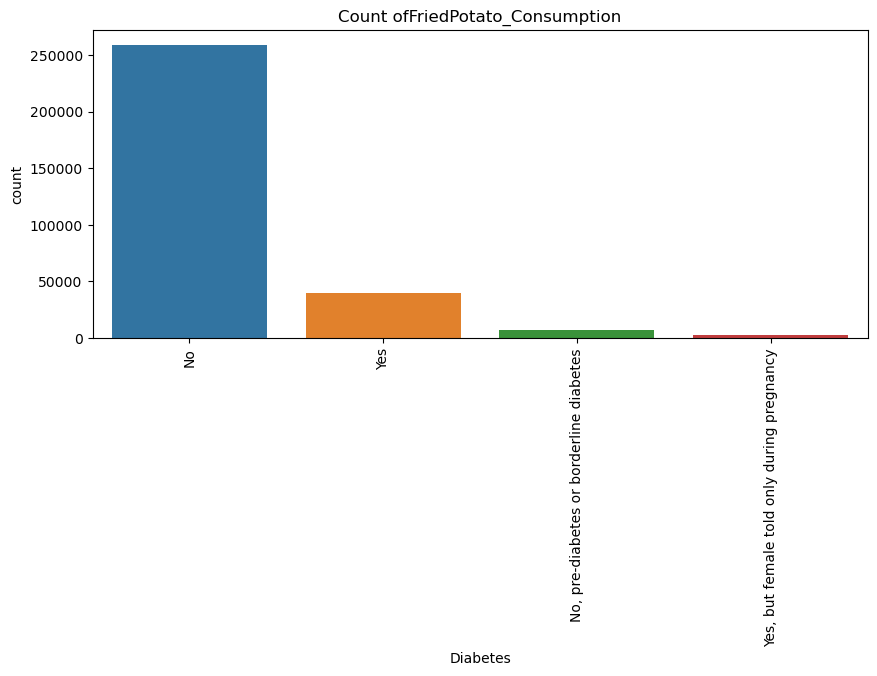

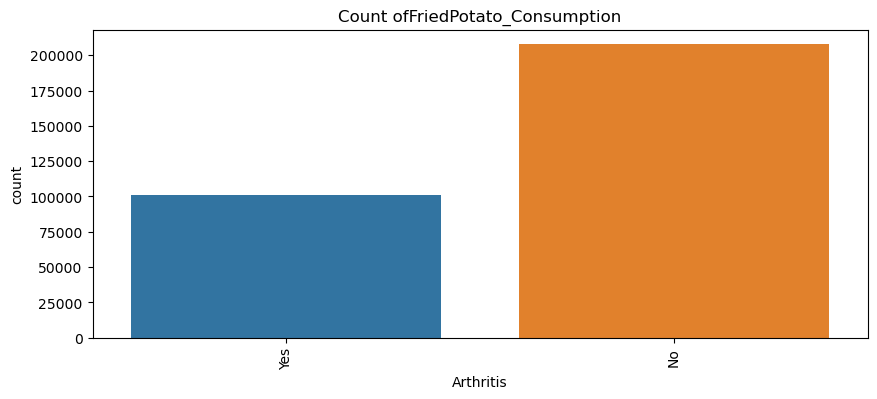

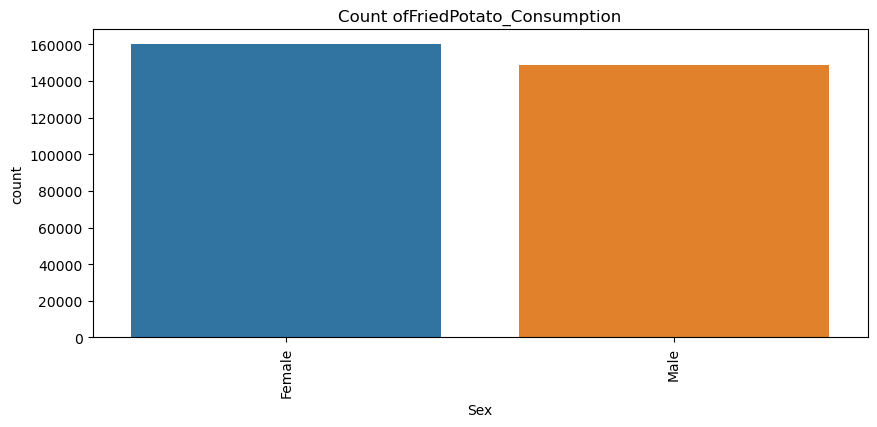

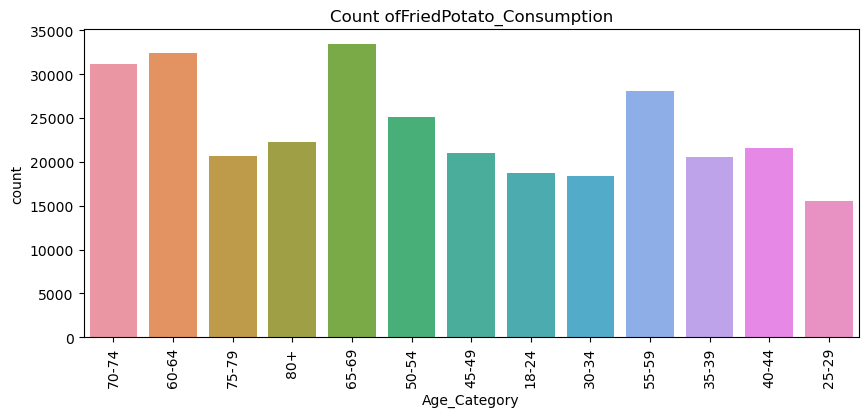

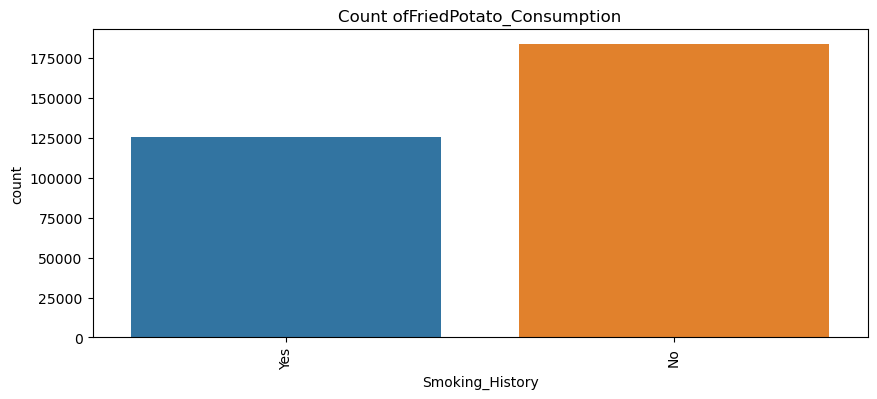

In [10]:
categorical_features = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

for j in categorical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(x = j,data = df)
    plt.title("Count of"+ i)
    plt.xticks(rotation = 90)
    plt.show()

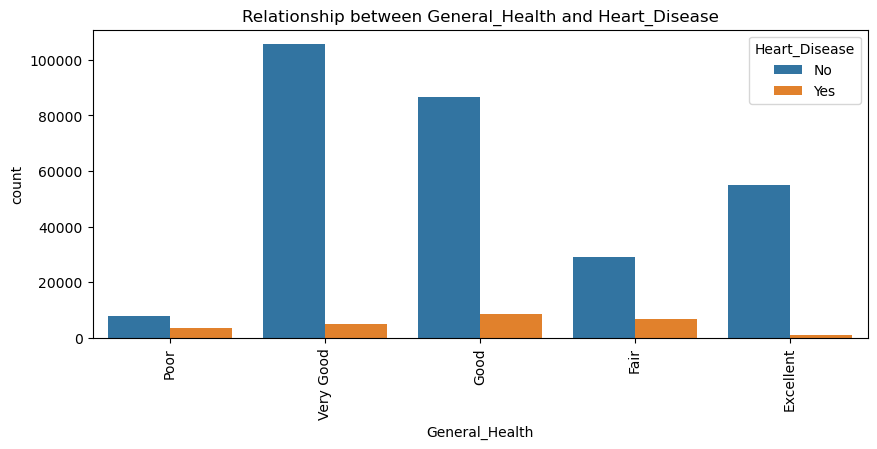

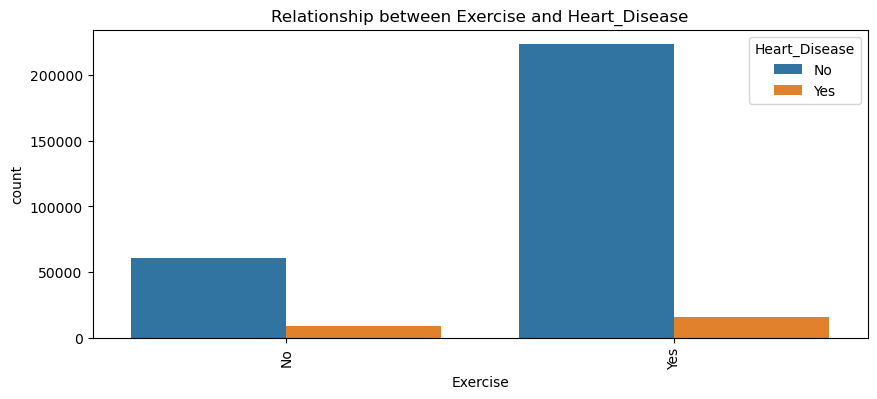

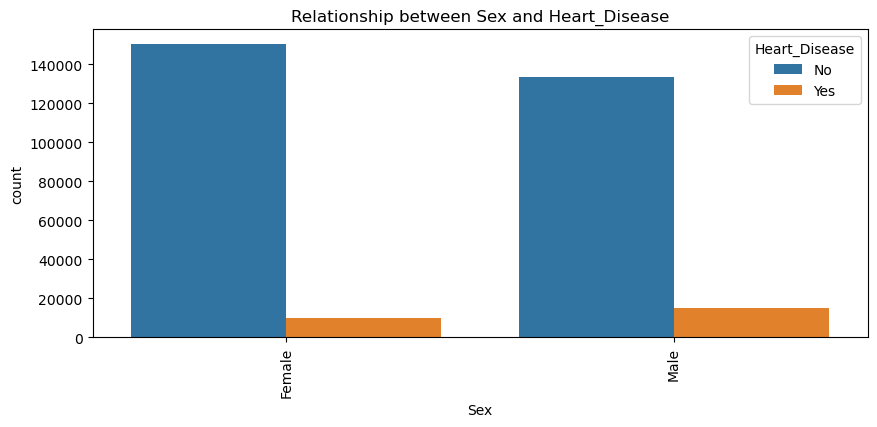

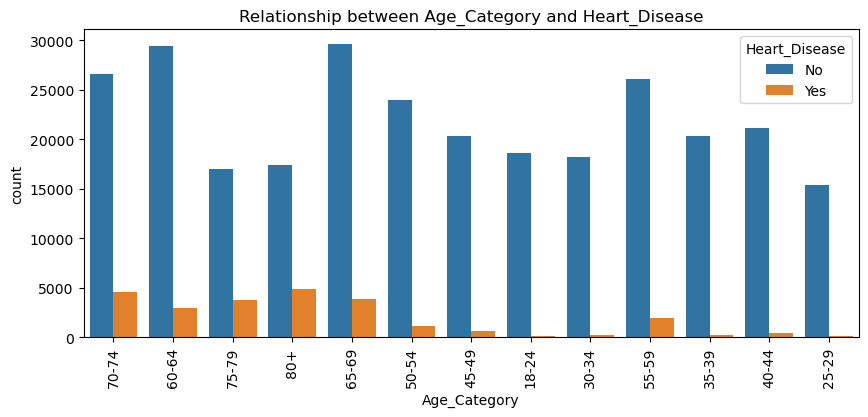

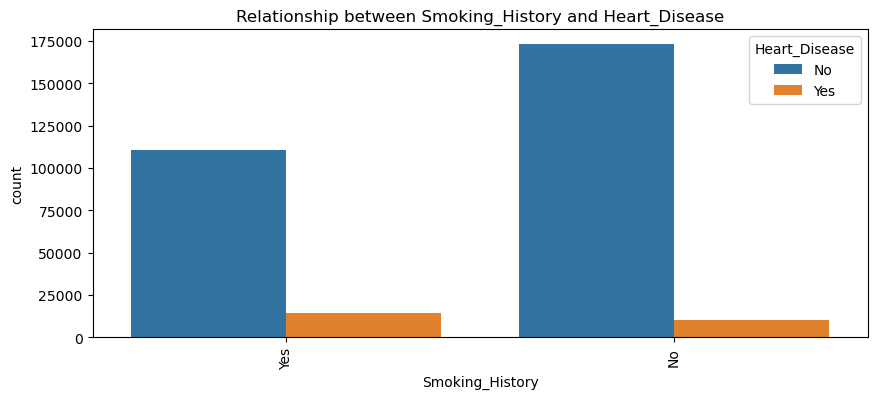

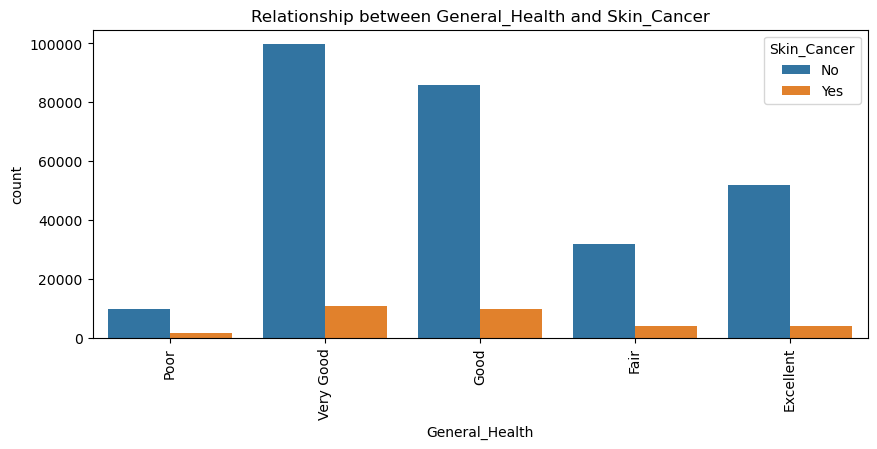

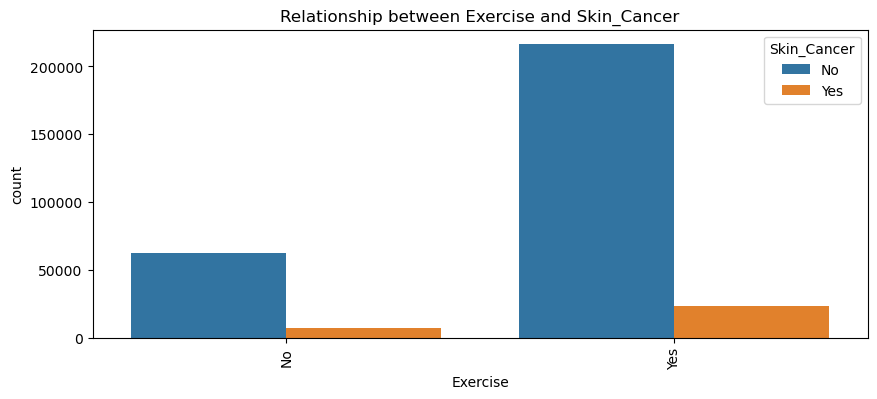

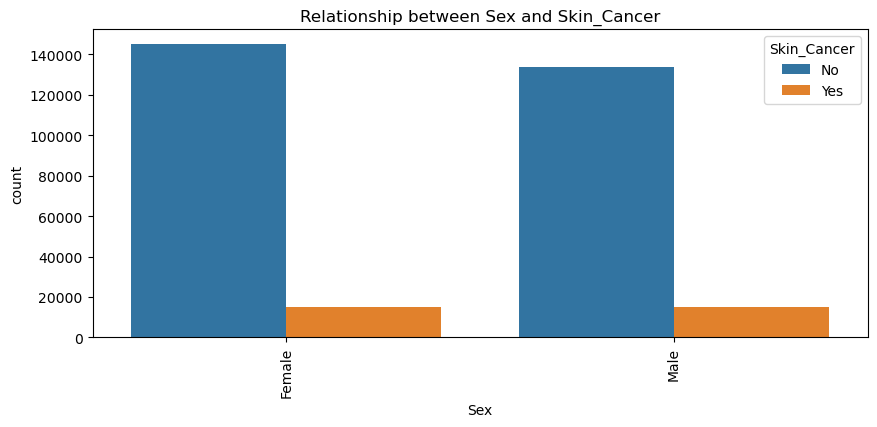

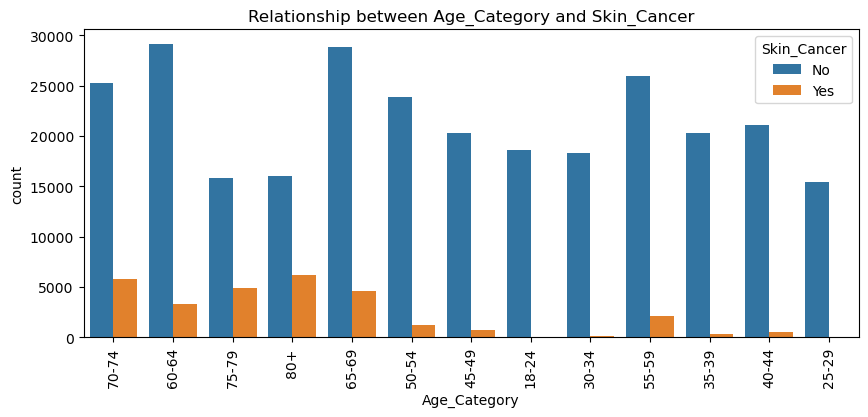

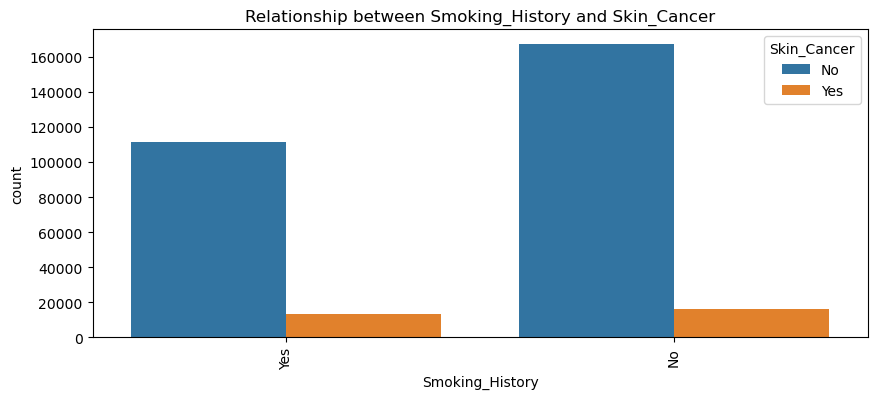

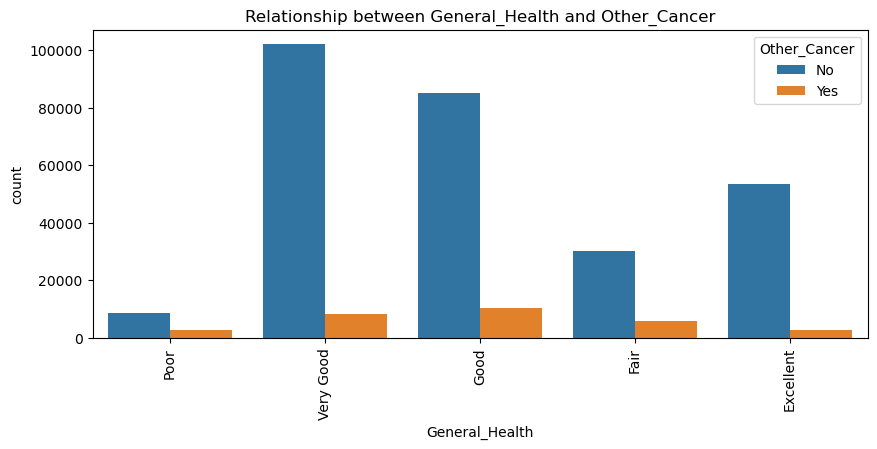

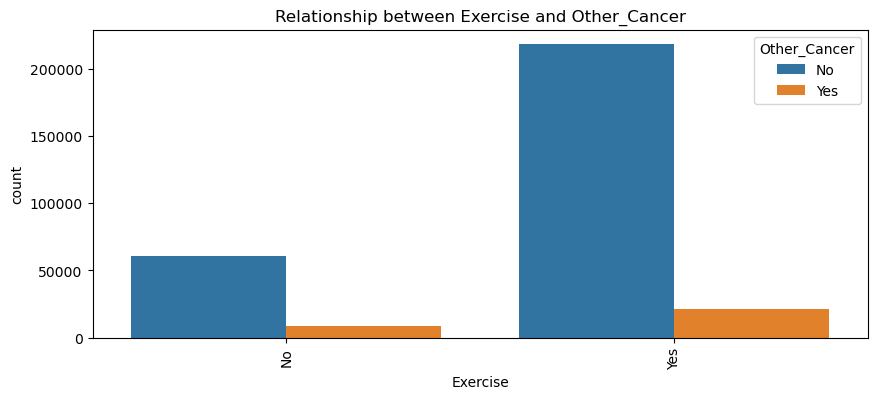

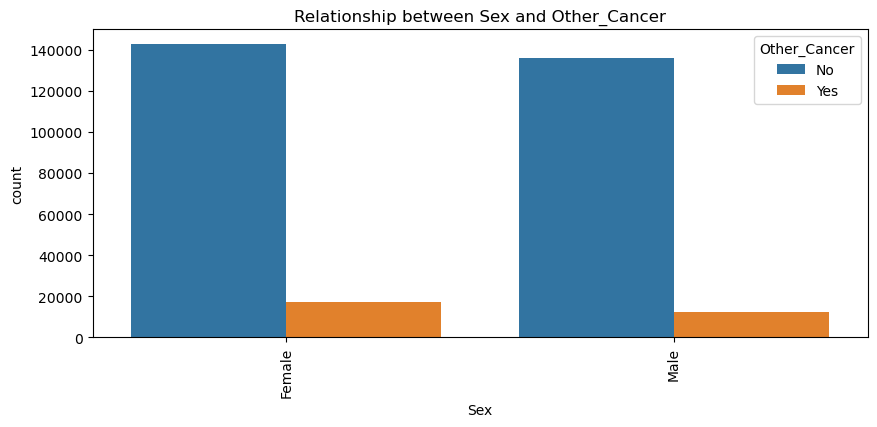

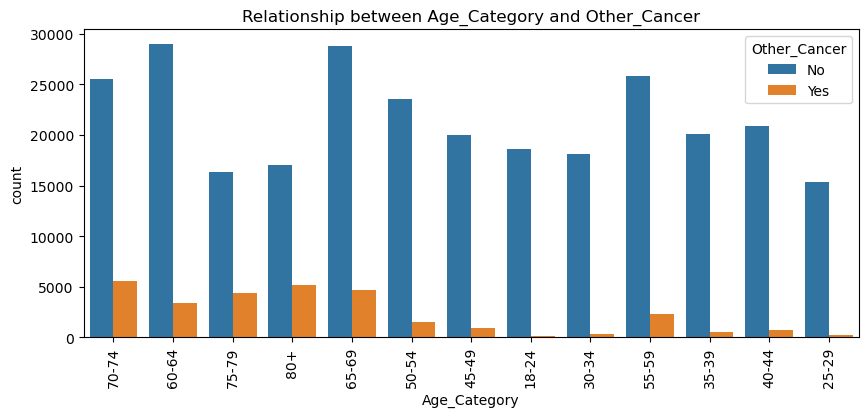

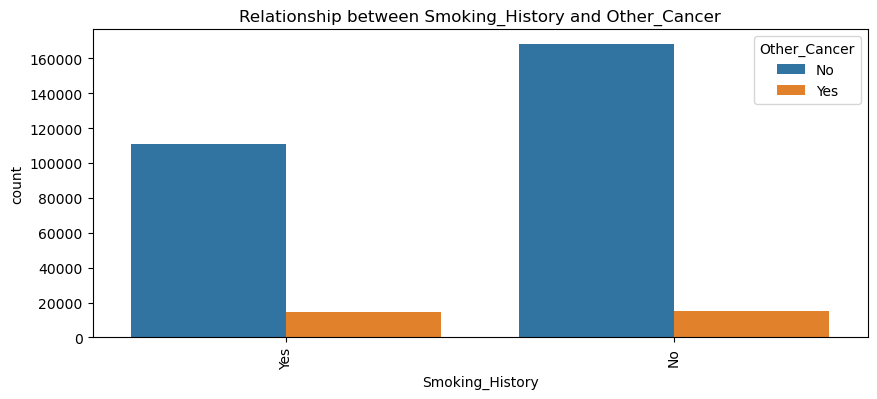

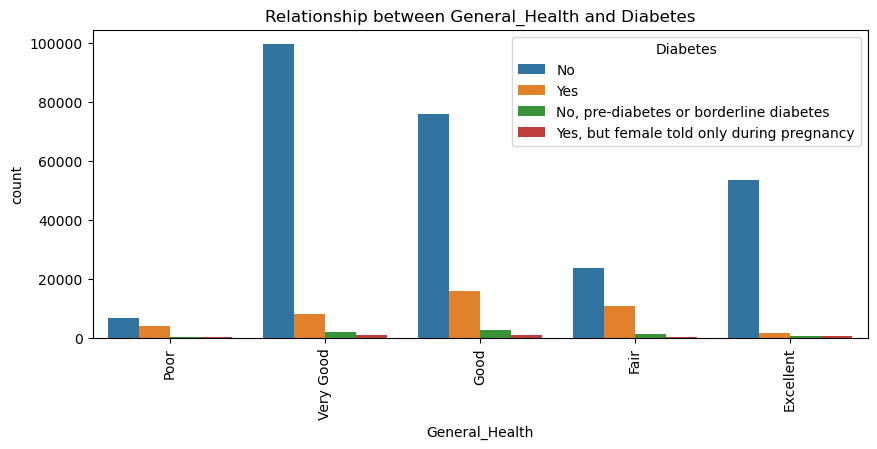

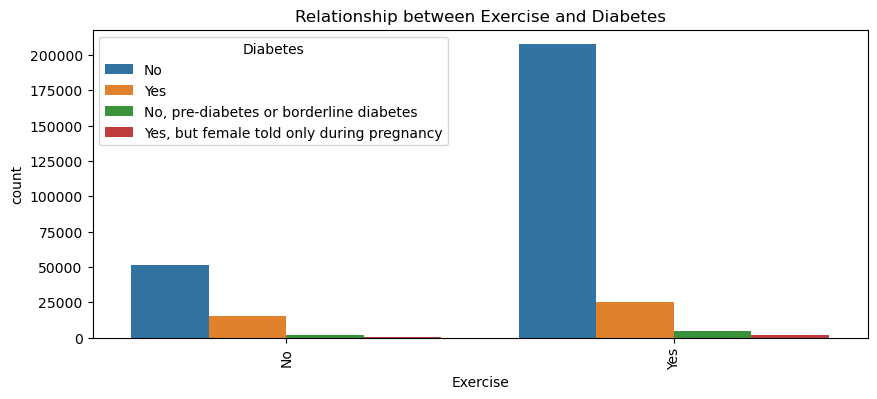

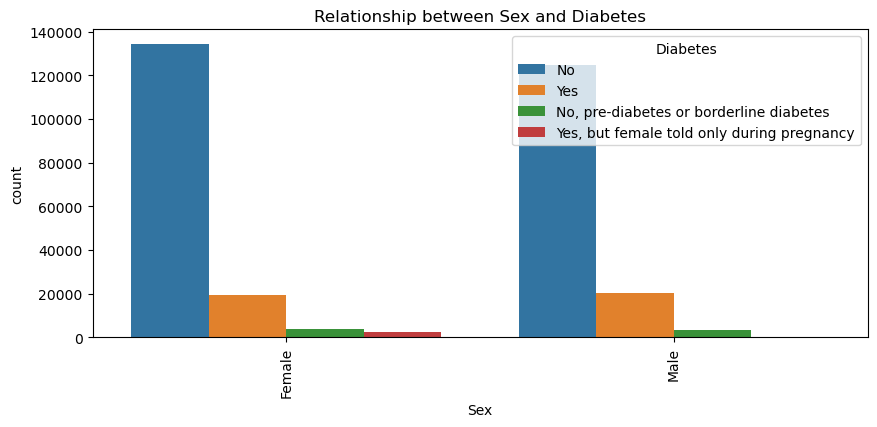

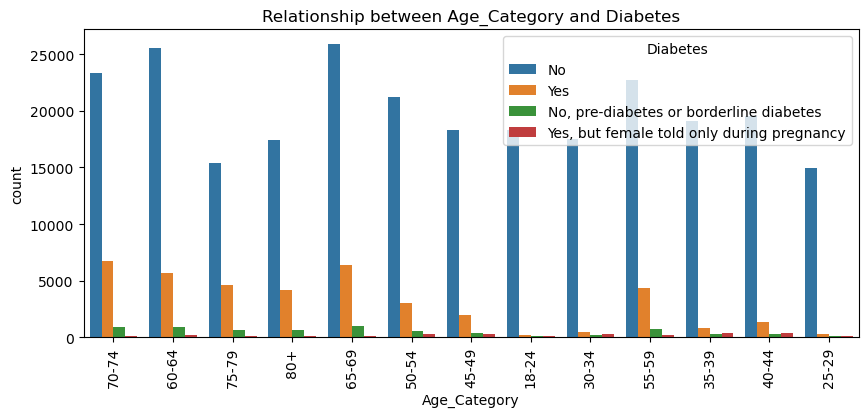

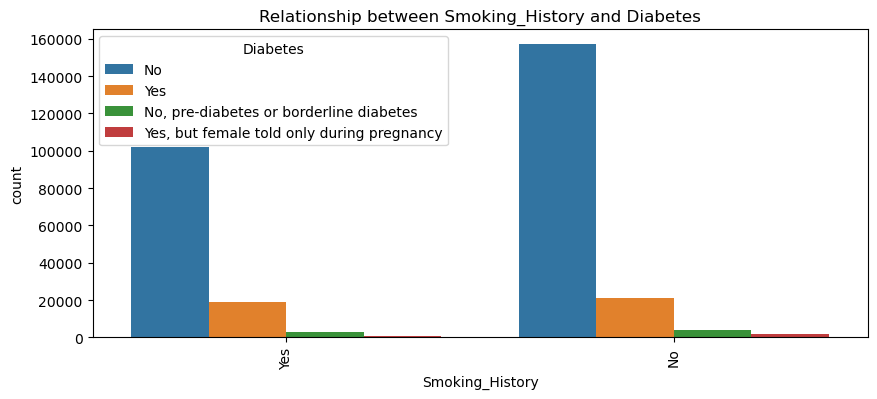

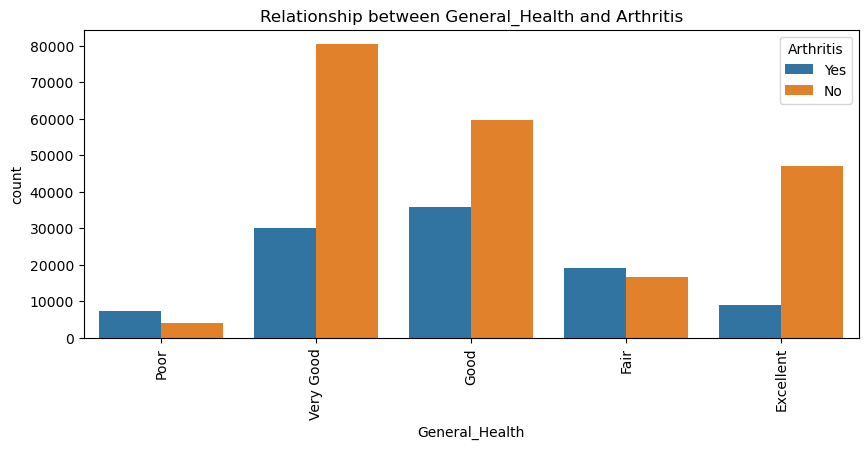

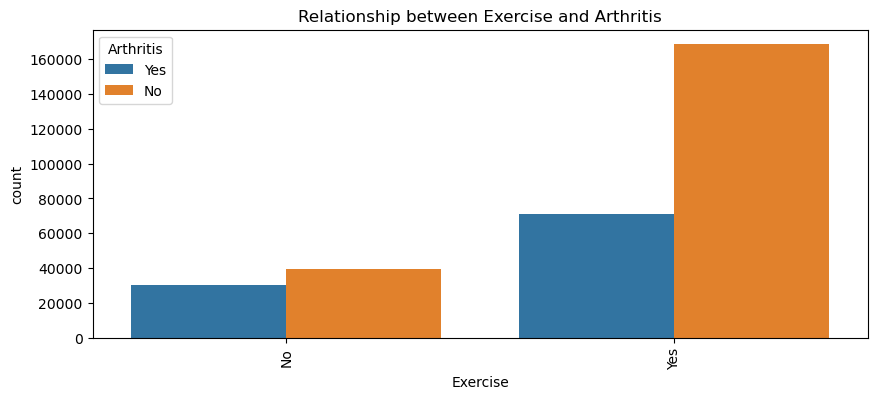

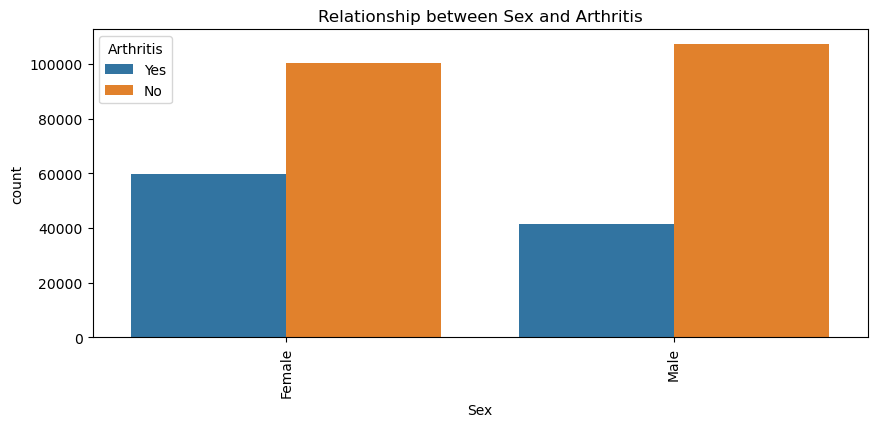

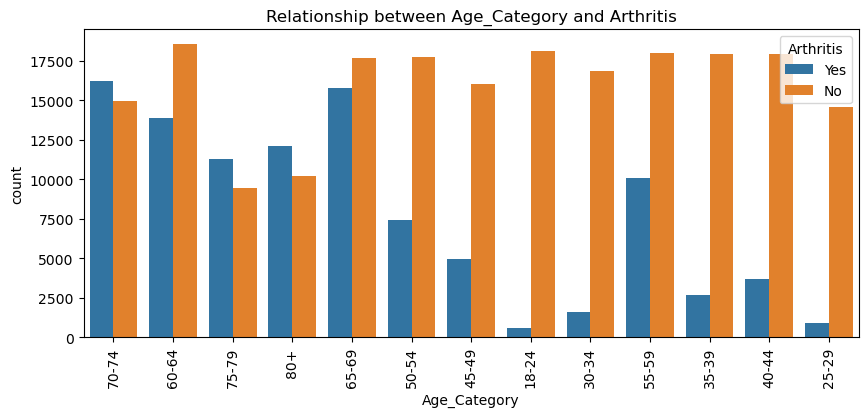

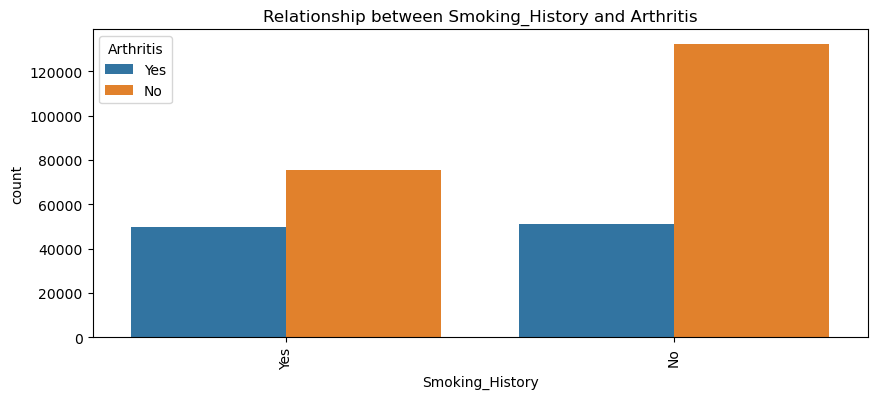

In [11]:
selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()

/tmp/ipykernel_20/2804321087.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot= True)


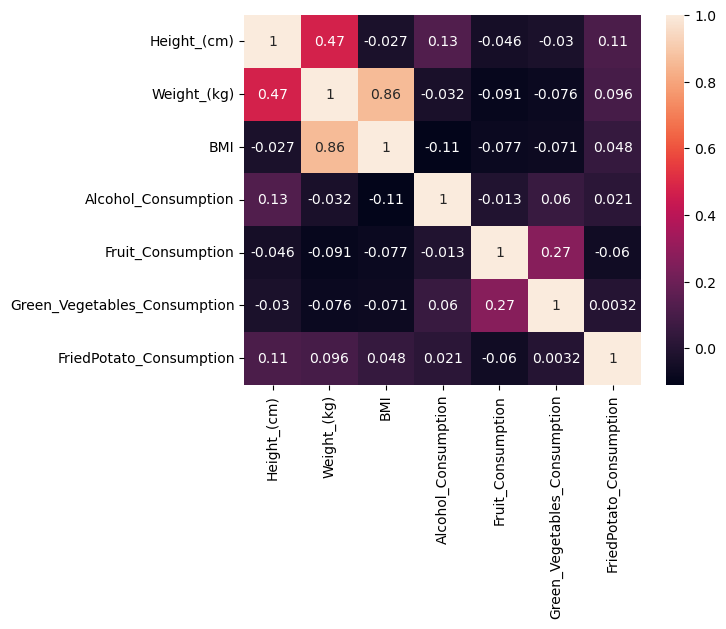

In [12]:
sns.heatmap(df.corr(),annot= True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


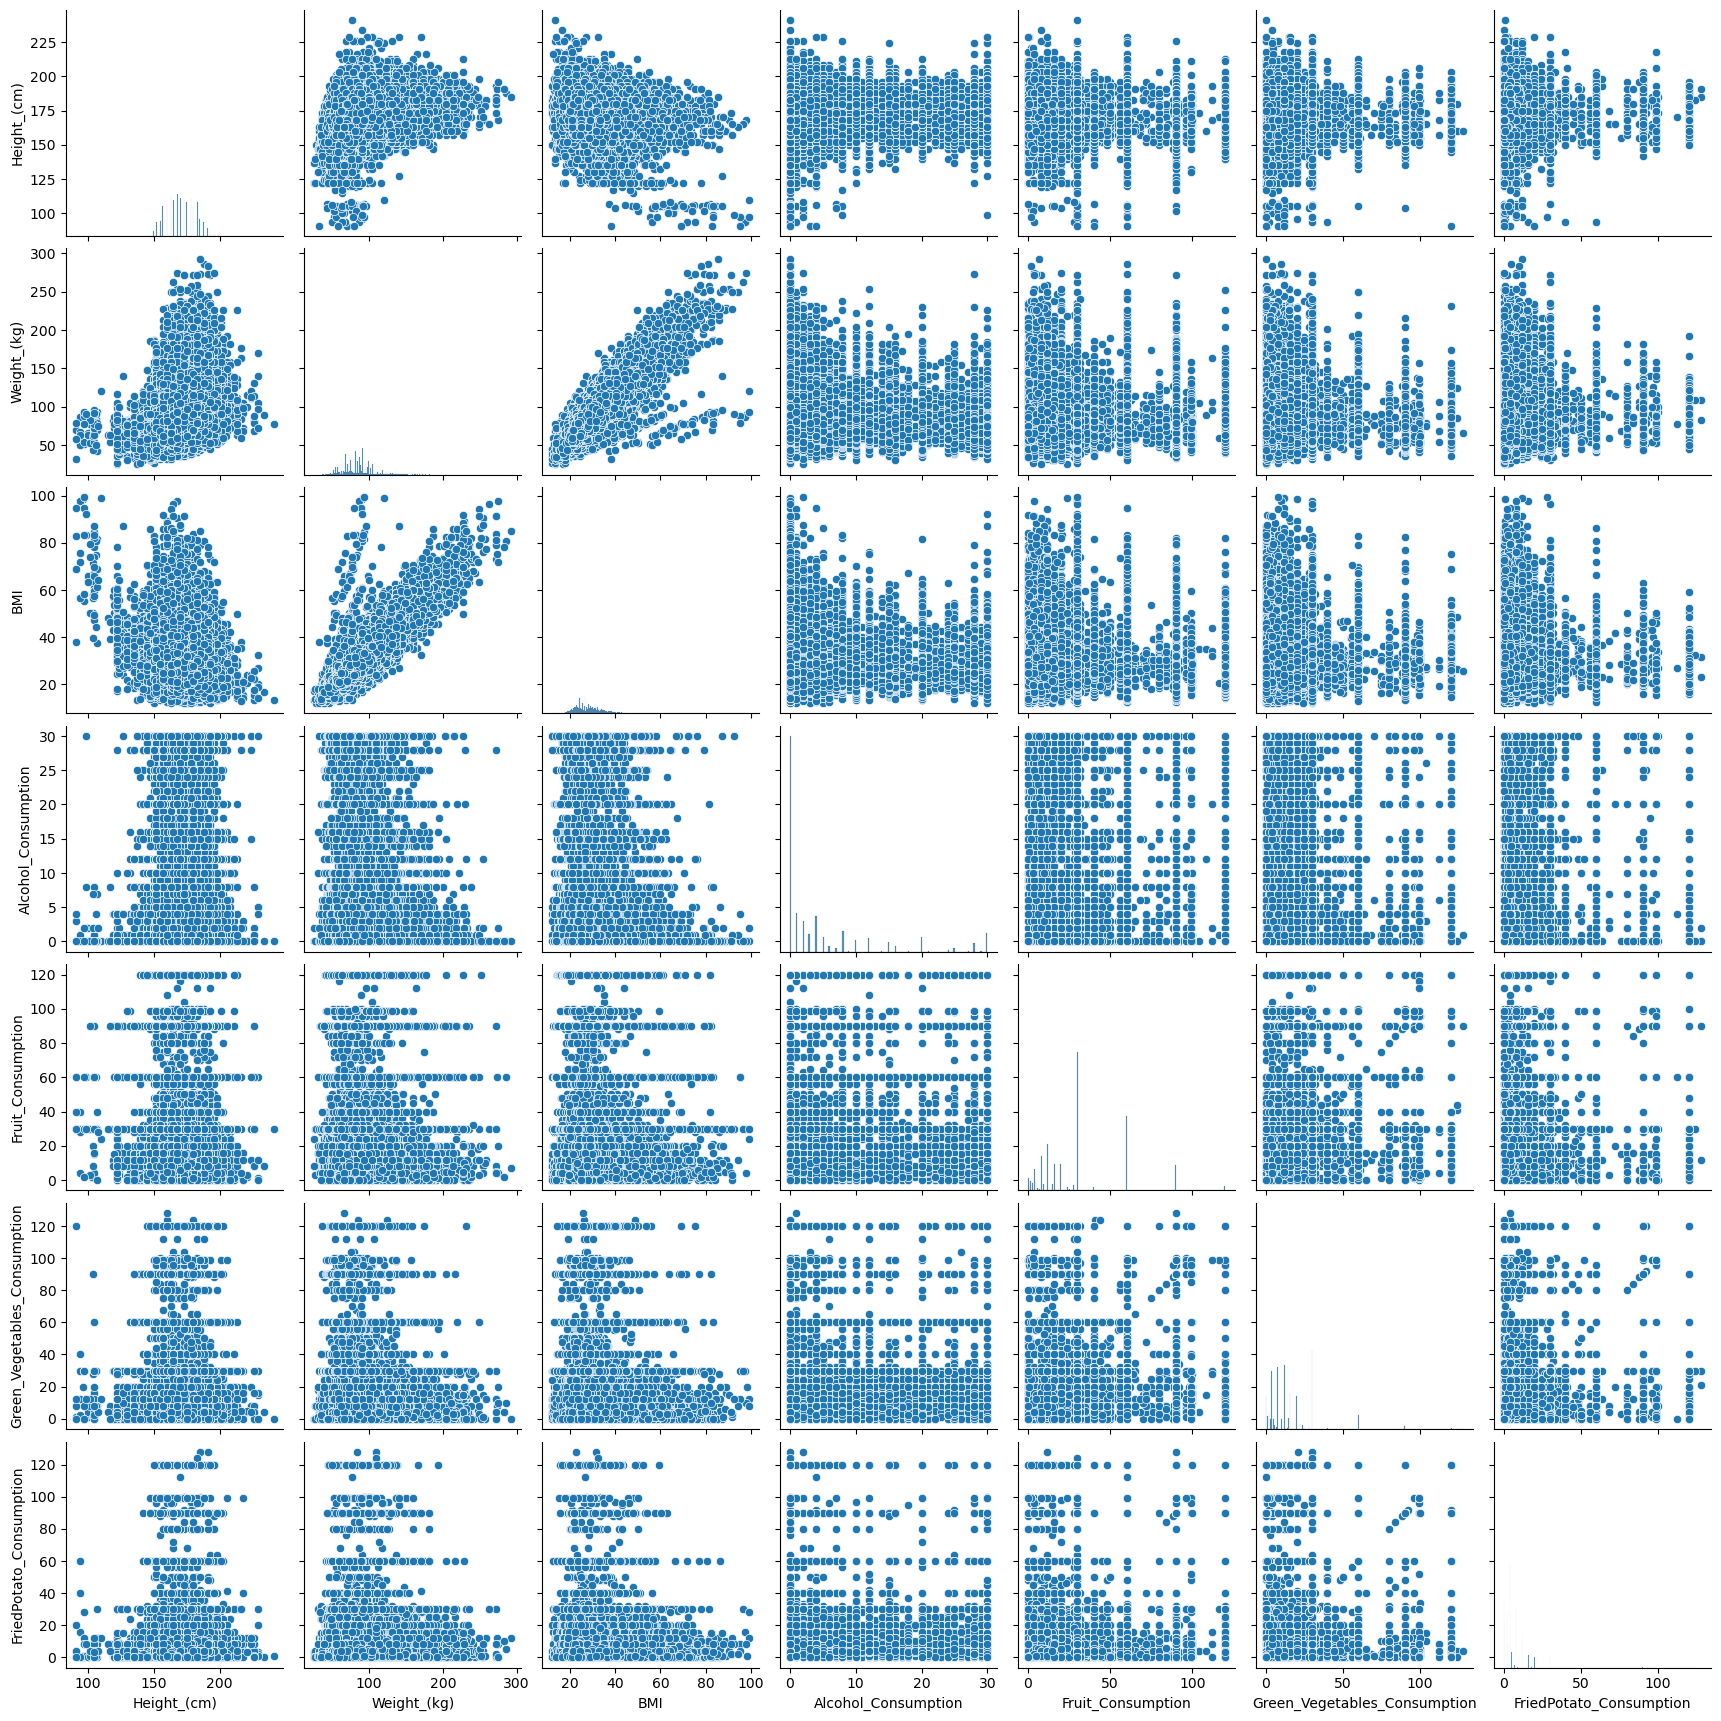

In [13]:
sns.pairplot(df)

In [14]:
# convert category column in 0 and 1
df = pd.get_dummies(df, columns=['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis','Smoking_History','Sex'], drop_first=True)

In [15]:
# convert General_health
ordinal_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5
}
df['General_Health'] = df['General_Health'].map(ordinal_mapping)


In [16]:
age_mapping = {
    '70-74': 72,
    '60-64': 62,
    '75-79': 77,
    '80+': 85,
    '65-69': 67,
    '50-54': 52,
    '45-49': 47,
    '18-24': 21,
    '30-34': 32,
    '55-59': 57,
    '35-39': 37,
    '40-44': 42,
    '25-29': 27
}

df['Age_Category'] = df['Age_Category'].map(age_mapping)

In [17]:
df1 = df.drop('Checkup',axis = 1)

In [18]:
df1.sample(5)

,General_Health,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Smoking_History_Yes,Sex_Male
241011,5,52,152.0,68.04,29.29,0.0,99.0,25.0,10.0,0,0,1,0,0,0,0,0,0,1,0
130755,4,67,175.0,86.18,28.06,2.0,60.0,16.0,2.0,1,1,0,0,1,0,0,0,0,0,1
12117,4,85,157.0,65.77,26.52,30.0,30.0,16.0,0.0,1,0,0,0,0,0,0,0,0,1,0
127701,3,52,183.0,108.86,32.55,1.0,12.0,16.0,3.0,1,0,0,0,0,0,0,0,1,1,1
149321,5,62,168.0,82.55,29.38,0.0,1.0,0.0,1.0,1,0,0,0,1,1,0,0,1,1,0


In [19]:
df1.columns

Index(['General_Health', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'Exercise_Yes', 'Heart_Disease_Yes', 'Skin_Cancer_Yes',
       'Other_Cancer_Yes', 'Depression_Yes',
       'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes',
       'Diabetes_Yes, but female told only during pregnancy', 'Arthritis_Yes',
       'Smoking_History_Yes', 'Sex_Male'],
      dtype='object')

In [20]:
x = df1.drop('Heart_Disease_Yes',axis = 1)
y = df1['Heart_Disease_Yes']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [22]:
rfc = RandomForestClassifier()

In [23]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
predict = rfc.predict(x_test)

In [25]:
print(classification_report(y_test,predict))
print("*************************************************************")
print("Accuracy : ",accuracy_score(y_test,predict)*100)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85149
           1       0.45      0.04      0.07      7508

    accuracy                           0.92     92657
   macro avg       0.69      0.52      0.51     92657
weighted avg       0.88      0.92      0.89     92657

*************************************************************
Accuracy :  91.82900374499499
